In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import nltk, os, re, string
from nltk.corpus import stopwords
import string

In [2]:
train = pd.read_csv("../Dataset/twitter_parsed_dataset.csv")

In [4]:
train = train.drop(columns=['index','id'])
train.head()

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,#mkr No No No No No No,none,0.0


In [5]:
train['Text'] = train['Text'].fillna("")

In [6]:
train['oh_label'] = train['oh_label'].fillna(0)

In [9]:
only_english = set(nltk.corpus.words.words())
def clean_text(text):
    
    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('[%s]' % re.escape(string.punctuation), '', sample) #punctuations
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes
    
    sample = ' '.join([w for w in nltk.wordpunct_tokenize(sample) if w.lower() in only_english or not w.isalpha()]) #doesn't remove indian languages
    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english
    
    sample = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', sample) #emojis and symbols
    sample = sample.strip()
    sample = " ".join([x.strip() for x in sample.split()])
    
    return sample

In [10]:
train['cleaned_text'] = train['Text'].apply(lambda x: clean_text(x))
train

,Text,Annotation,oh_label,cleaned_text
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,i read them in change in meaning the history o...
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,shreyabafna3 now you claim that people who tri...
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,call me but when i go to an auto place id rath...
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,wrong the example of and the exactly
4,#mkr No No No No No No,none,0.0,no no no no no no
...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,0.0,feeling so sorry for the they should be safe a...
16847,#MKR 'pretty good dishes we're happy with' - O...,none,0.0,pretty good were happy with well never eating ...
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0,lemon we please go just one season of without ...
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0,you are too stupid to talk to blocked


In [11]:
%%time
# STEPS TAKEN FROM SRK NOTEBOOK
# LOWER CASE ALL CHARACTERS 
train.Text = train.Text.apply(lambda x: x.lower())

## LEMMATIZATION
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
lemmatizer = WordNetLemmatizer()

def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

train.Text = train.Text.apply(lambda x: lem(x))

# REMOVING PUNCTUATION
def cleaner(text):
    return(text.translate(str.maketrans('','', string.punctuation)))
train.Text = train.Text.apply(lambda x: cleaner(x))

# REMOVING STOPWORDS
st_words = stopwords.words()
def stopword(text):
    return(' '.join([w for w in text.split() if w not in st_words ]))
train.Text = train.Text.apply(lambda x: stopword(x))

Wall time: 32.5 s


In [12]:
## A. TOTAL NUMBER OF WORDS USED 
train['nb_words'] = train.Text.apply(lambda x: len(x.split()))

## B. TOTAL NUMBER OF UNIQUE WORDS USED
train['nb_unique_words'] = train.Text.apply(lambda x: len(set(x.split())))

## C. TOTAL NUMBER OF CHARACTERS USED
train['nb_char'] = train.Text.apply(lambda x: len(x))

In [13]:
## D. TOTAL NUMBER OF PUNCTUATION USED
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
train['nb_punct'] = train.Text.apply(lambda x: punct(x))

## E. TOTAL NUMBER OF STOPWORDS USED
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
train['nb_stopwords'] = train.Text.apply(lambda x: stop(x))

## F. TOTAL NUMBER OF TITLE WORDS USED
def title(text):
    return(len([w for w in text.split() if w.istitle()]))
train['nb_title_case'] = train.Text.apply(lambda x: title(x))

## G. AVERAGE LENGTH OF WORDS
def length(text):
    return(np.mean([len(w) for w in text.split()]))
train['avg_len_word'] = train.Text.apply(lambda x: length(x))

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Revi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
## H. NUMBER OF MOST FREQUENT TERMS
token = nltk.word_tokenize(''.join(train.Text))
frequent = nltk.FreqDist(token)
frequent.most_common(15)

[('mkr', 1315),
 ('sexist', 1049),
 ('like', 945),
 ('woman', 936),
 ('wa', 888),
 ('dont', 789),
 ('kat', 780),
 ('islam', 703),
 ('muslim', 671),
 ('mkrrt', 662),
 ('people', 658),
 ('get', 656),
 ('amp', 643),
 ('think', 503),
 ('andre', 496)]

In [18]:
## REMOVING PUNCTUATION AND STOPWORDS FROM MOST FREQUENT WORDS
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('mkr', 1315),
 ('sexist', 1049),
 ('like', 945),
 ('woman', 936),
 ('wa', 888),
 ('dont', 789),
 ('kat', 780),
 ('islam', 703),
 ('muslim', 671),
 ('mkrrt', 662),
 ('people', 658),
 ('get', 656),
 ('amp', 643),
 ('think', 503),
 ('andre', 496)]

In [19]:
%%time
## I. NUMBER OF WORDS CONTAIN OUT OF MOST COMMON 100 WORDS 
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
train['nb_freq_words'] = train.Text.apply(lambda x: freq(x))

Wall time: 167 ms


In [22]:
%%time
## J. AVERAGE OF FREQ TERMS WITH TOTAL WORDS USED
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    if len(text.split()) > 0:
        return(len([w for w in text.split() if w in freq_words])/len(text.split()))
    else:
        return 0
    
train['avg_freq_word']= train.Text.apply(lambda x: freq(x))

Wall time: 187 ms


In [23]:
train_label = train.oh_label
train_backup = train
train = train.drop(columns=['oh_label','Text'])
train.head(1)

,Annotation,cleaned_text,nb_words,nb_unique_words,nb_char,nb_punct,nb_stopwords,nb_title_case,avg_len_word,nb_freq_words,avg_freq_word
0,none,i read them in change in meaning the history o...,11,11,109,0,0,0,9.0,2,0.181818


In [25]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
import xgboost as xgb
import lightgbm as lgb

In [43]:
## Helper function to train and plot LGB and XGB models
param_xgb = {}
param_xgb['objective'] = 'multi:softprob'
param_xgb['num_class'] = 2
param_xgb['learning_rate'] = 0.1
param_xgb['seed'] = 666
param_xgb['eval_metric'] = 'mlogloss'

param_lgb = {}
param_lgb['objective'] = 'multiclass'
param_lgb['num_classes'] = 2
param_lgb['learning_rate'] = 0.1
param_lgb['seed'] = 666
param_lgb['metric'] = 'multi_logloss'

def lgb_xgb_helper(train, train_label ,name):
    cv = []
    pred_based_on_cv = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 2)))
    kfold = KFold(n_splits=5, shuffle= True, random_state=2019)
    for t_index, v_index in kfold.split(train_label.ravel()):
        xtrain, ytrain = train.loc[t_index,:], train_label[t_index]
        xtest, ytest = train.loc[v_index,:], train_label[v_index]
        if (name == 'xgb'):
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest, label=ytest)
            model = xgb.train(list(param_xgb.items()), trainset, evals=[(trainset,'train'), (testset,'test')], 
                             num_boost_round = 5000, early_stopping_rounds = 200, verbose_eval= 200)
            pred_based_on_cv.loc[v_index,:] = model.predict(testset, ntree_limit = model.best_ntree_limit)
        else :
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest, reference=trainset)
            model = lgb.train(param_lgb, trainset, valid_sets= testset ,
                             num_boost_round= 5000, early_stopping_rounds = 200,  verbose_eval= 200)
            pred_based_on_cv.loc[v_index,:] = model.predict(xtest, best_iteration = model.best_iteration)
    cv.append(log_loss(ytest, pred_based_on_cv.loc[v_index,:]))
    return(np.mean(cv), pred_based_on_cv, model)

def lgb_xgb_plotting(cv, pred, label, model, name=None):
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    print("CV score : %s" %cv)
    sns.heatmap(confusion_matrix(label, np.argmax(pred.values, axis=1)), annot=True, ax= ax[0])
    ax[0].set_title("Accuracy : %s" % accuracy_score(np.argmax(pred.values, axis=1), train_label))
    name.plot_importance(model, ax= ax[1])
    plt.title("Feature Importance")
    return(accuracy_score(np.argmax(pred.values, axis=1), train_label), cv)

In [31]:
train.head()

,Annotation,cleaned_text,nb_words,nb_unique_words,nb_char,nb_punct,nb_stopwords,nb_title_case,avg_len_word,nb_freq_words,avg_freq_word
0,none,i read them in change in meaning the history o...,11,11,109,0,0,0,9.000000,2,0.181818
1,none,shreyabafna3 now you claim that people who tri...,13,12,99,0,0,0,6.692308,2,0.153846
2,sexism,call me but when i go to an auto place id rath...,11,11,62,0,0,0,4.727273,5,0.454545
3,racism,wrong the example of and the exactly,7,7,60,0,0,0,7.714286,2,0.285714
4,none,no no no no no no,1,1,3,0,0,0,3.000000,1,1.000000


In [32]:
plotdata = train.drop(["Annotation","cleaned_text"],axis=1)

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

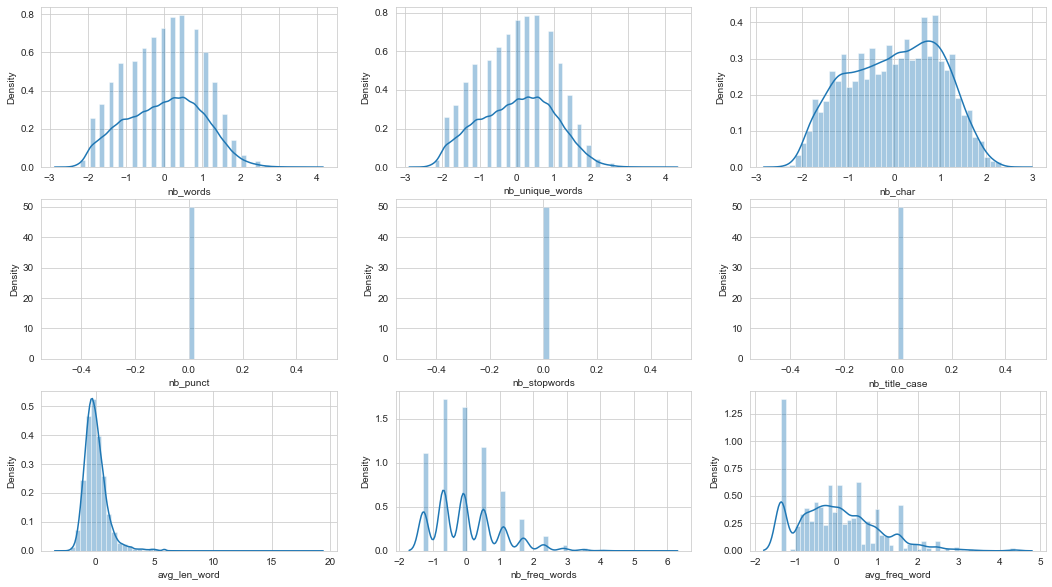

In [44]:
# Let's check data distribution
plt.subplots(3,3, figsize = (18,10))
i = 1
for col in plotdata.columns :
    plt.subplot(3,3,i)
    sns.distplot(plotdata[col])
    i = i+1

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oh_label', ylabel='count'>

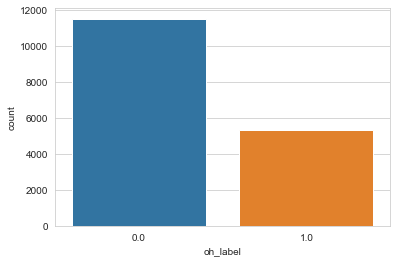

In [37]:
sns.countplot(train_backup.oh_label)

In [45]:
std_scaler = StandardScaler()
plotdata = pd.DataFrame(std_scaler.fit_transform(plotdata), columns = plotdata.columns)

In [46]:
# TRAIN LGB MODEL ON META FEATURES
cv, pred, model = lgb_xgb_helper(plotdata, train_label, 'lgb')

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 13480, number of used features: 6
[LightGBM] [Info] Start training from score -0.381134
[LightGBM] [Info] Start training from score -1.149125
Training until validation scores don't improve for 200 rounds
[200]	valid_0's multi_logloss: 0.599995
Early stopping, best iteration is:
[26]	valid_0's multi_logloss: 0.58386
[LightGBM] [Warning] Unknown parameter: best_iteration
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 13481, number of used features: 6
[LightGBM] [Info] 

CV score : 0.5798872795170672


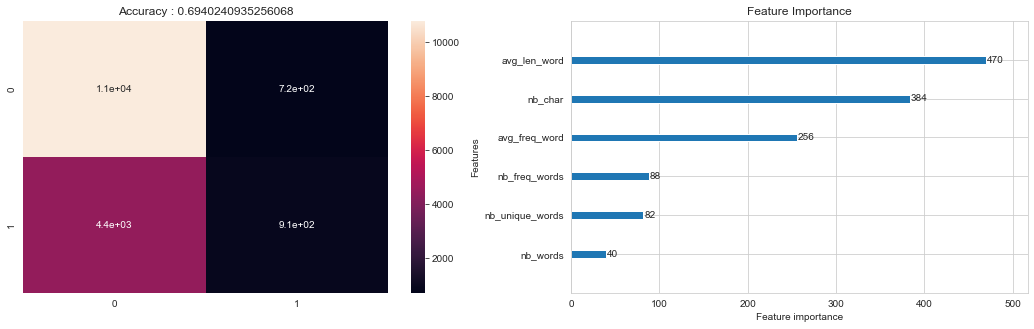

In [47]:
# PLOTTING LGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
meta_acc_lgb, meta_cv_lgb = lgb_xgb_plotting(cv , pred, train_label, model, lgb)

In [48]:
# TRAIN XGB MODEL ON META FEATURES
cv, pred, model = lgb_xgb_helper(plotdata, train_label, 'xgb')

[0]	train-mlogloss:0.67256	test-mlogloss:0.67456
[200]	train-mlogloss:0.52263	test-mlogloss:0.59845
[227]	train-mlogloss:0.51864	test-mlogloss:0.60076
[0]	train-mlogloss:0.67251	test-mlogloss:0.67470


D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[200]	train-mlogloss:0.52191	test-mlogloss:0.60113
[231]	train-mlogloss:0.51567	test-mlogloss:0.60372
[0]	train-mlogloss:0.67268	test-mlogloss:0.67361
[200]	train-mlogloss:0.52071	test-mlogloss:0.59724
[228]	train-mlogloss:0.51604	test-mlogloss:0.60111
[0]	train-mlogloss:0.67245	test-mlogloss:0.67380
[200]	train-mlogloss:0.52092	test-mlogloss:0.59581
[230]	train-mlogloss:0.51535	test-mlogloss:0.59916
[0]	train-mlogloss:0.67285	test-mlogloss:0.67380
[200]	train-mlogloss:0.52493	test-mlogloss:0.59408
[234]	train-mlogloss:0.51864	test-mlogloss:0.59760


CV score : 0.581809765966764


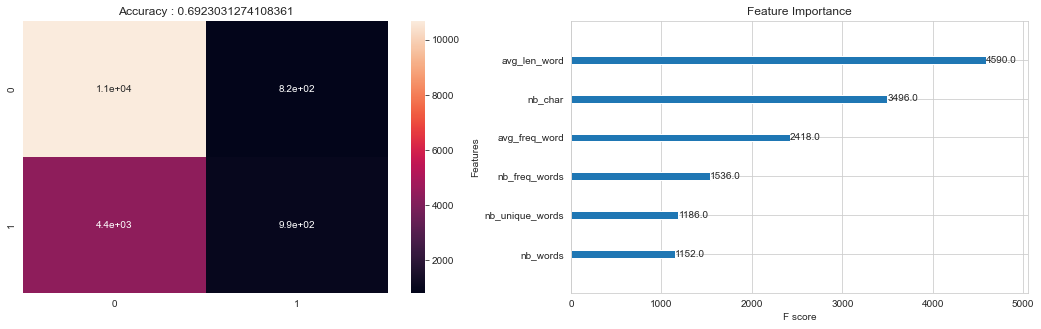

In [49]:
# PLOTTING XGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
meta_acc_xgb, meta_cv_xgb = lgb_xgb_plotting(cv, pred, train_label, model, xgb)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB

In [51]:
def helper(train, train_label ,model):
    cv = []
    pred_based_on_cv = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 2)))
    kfold = KFold(n_splits=5, shuffle= True, random_state= 2019)
    for t_index, v_index in kfold.split(train_label.ravel()):
        xtrain, ytrain = train[t_index,:], train_label[t_index]
        xtest, ytest = train[v_index,:], train_label[v_index]
        
        model.fit(xtrain, ytrain)
        pred_based_on_cv.loc[v_index,:] = model.predict_proba(xtest)
        cv.append(log_loss(ytest, pred_based_on_cv.loc[v_index,:]))
    return(np.mean(cv), pred_based_on_cv)

def plotting_helper(cv, pred, label, name=None):
    print("CV score : %s" %cv)
    plt.figure(figsize = (9,5))
    sns.heatmap(confusion_matrix(label, np.argmax(pred.values, axis=1)), annot=True)
    plt.title("Accuracy : %s" % accuracy_score(np.argmax(pred.values, axis=1), train_label))
    return(accuracy_score(np.argmax(pred.values, axis=1), train_label), cv)

In [53]:
# COUNT VECTORIZATION USING WORD AS LOWEST LEVEL
count_vec = CountVectorizer(ngram_range=(1,3), stop_words='english')
count_vec.fit(train_backup['Text'].values.tolist())
train_count_vec = count_vec.transform(train_backup['Text'].values.tolist())
train_count_vec.shape

(16851, 219701)

CV score : 0.7910431474753945


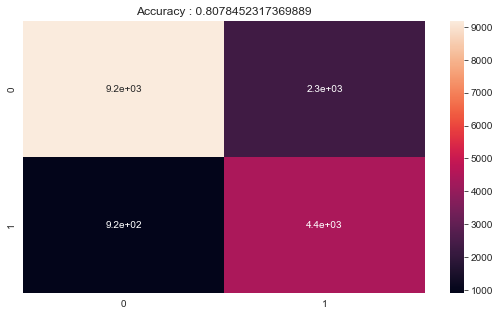

In [54]:
cv, pred = helper(train_count_vec, train_label, MultinomialNB())
count_acc_mnb, count_cv_mnb = plotting_helper(cv, pred, train_label)

In [55]:
# REDUCING DIMENSION OF SPARSE MATRIX TO 20 COMPONENTS
svd = TruncatedSVD(n_components=20)
svd.fit_transform(train_count_vec)
train_count_vec_svd = svd.transform(train_count_vec)
train_count_vec_svd.shape

(16851, 20)

In [56]:
# # TRAIN XGB MODEL ON TEXT BASED FEATURES
cv, pred, model = lgb_xgb_helper(pd.DataFrame(train_count_vec_svd), train_label, 'xgb')

[0]	train-mlogloss:0.65629	test-mlogloss:0.65771
[200]	train-mlogloss:0.27795	test-mlogloss:0.44140
[371]	train-mlogloss:0.20293	test-mlogloss:0.45172
[0]	train-mlogloss:0.65552	test-mlogloss:0.65832


D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[200]	train-mlogloss:0.27298	test-mlogloss:0.47006
[262]	train-mlogloss:0.24155	test-mlogloss:0.47165
[0]	train-mlogloss:0.65479	test-mlogloss:0.65886
[200]	train-mlogloss:0.27663	test-mlogloss:0.46820
[317]	train-mlogloss:0.21961	test-mlogloss:0.47561
[0]	train-mlogloss:0.65594	test-mlogloss:0.65760
[200]	train-mlogloss:0.28144	test-mlogloss:0.44104
[344]	train-mlogloss:0.21205	test-mlogloss:0.44752
[0]	train-mlogloss:0.65585	test-mlogloss:0.65760
[200]	train-mlogloss:0.27390	test-mlogloss:0.46195
[272]	train-mlogloss:0.23883	test-mlogloss:0.46683


CV score : 0.457375322027724


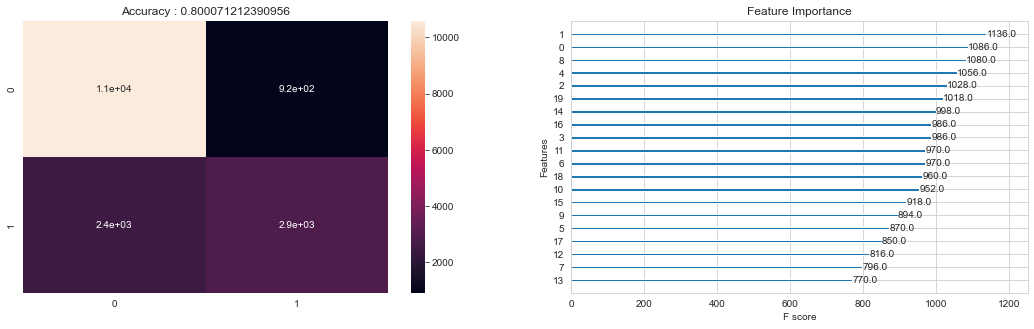

In [57]:
# PLOTTING XGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
count_acc_xgb, count_cv_xgb = lgb_xgb_plotting(cv, pred, train_label, model, xgb)

In [58]:
%%time
# # TRAIN LGB MODEL ON TEXT BASED FEATURES
cv, pred, model = lgb_xgb_helper(pd.DataFrame(train_count_vec_svd), train_label, 'lgb')

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 13480, number of used features: 20
[LightGBM] [Info] Start training from score -0.381134
[LightGBM] [Info] Start training from score -1.149125
Training until validation scores don't improve for 200 rounds
[200]	valid_0's multi_logloss: 0.444168
Early stopping, best iteration is:
[122]	valid_0's multi_logloss: 0.438082
[LightGBM] [Warning] Unknown parameter: best_iteration
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 13481, number of used features: 20
[LightGBM] [Info] Start training from score -0.380557
[LightGBM] [Info] Star

CV score : 0.45416843106201416


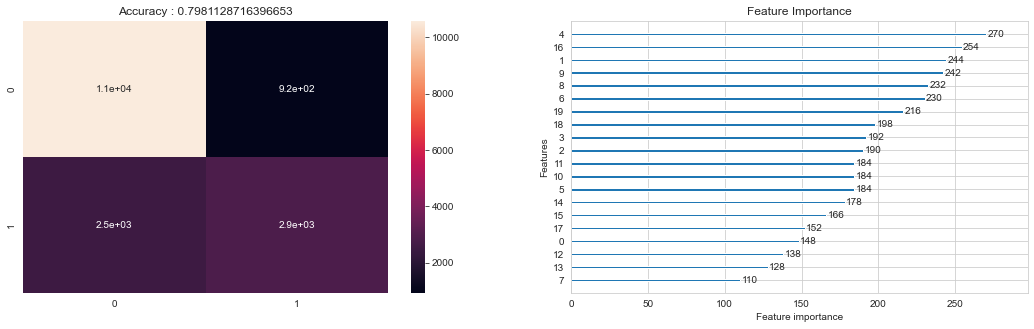

In [59]:
# PLOTTING LGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
count_acc_lgb, count_cv_lgb = lgb_xgb_plotting(cv, pred, train_label, model, lgb)

In [61]:
count_vec_char = CountVectorizer(ngram_range = (1,5), analyzer='char', stop_words='english')
count_vec_char.fit(train_backup.Text.values.tolist())
train_count_vec_char = count_vec_char.transform(train_backup.Text.values.tolist())

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\sklearn\feature_extraction\text.py:538: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


CV score : 4.054504451805797


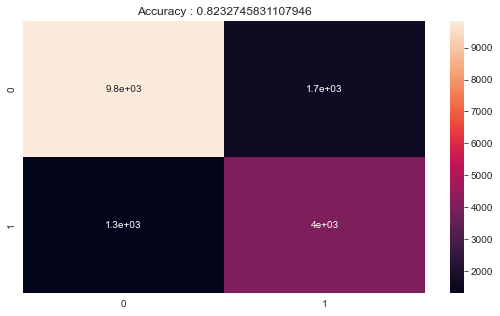

In [62]:
cv, pred = helper(train_count_vec_char, train_label, MultinomialNB())
count_acc_mnb_char, count_cv_mnb_char = plotting_helper(cv, pred, train_label)

<AxesSubplot:xlabel='Model', ylabel='logloss'>

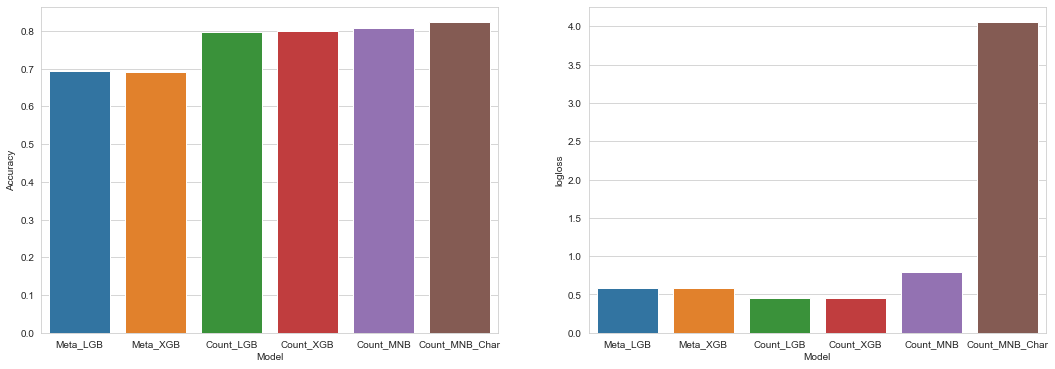

In [63]:
## COMPARISON OF MODELS TILL NOW
performance_accuracy = pd.DataFrame({'Model': ['Meta_LGB', 'Meta_XGB', 'Count_LGB', 'Count_XGB', 'Count_MNB', 'Count_MNB_Char'], 
              'Accuracy': [meta_acc_lgb, meta_acc_xgb, count_acc_lgb, count_acc_xgb, count_acc_mnb, count_acc_mnb_char]})

performance_logloss = pd.DataFrame({'Model': ['Meta_LGB', 'Meta_XGB', 'Count_LGB', 'Count_XGB', 'Count_MNB','Count_MNB_Char'], 
              'logloss': [meta_cv_lgb, meta_cv_xgb, count_cv_lgb, count_cv_xgb, count_cv_mnb, count_cv_mnb_char]})
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x = 'Model', y = 'Accuracy', data = performance_accuracy , ax= ax[0])
sns.barplot(x = 'Model', y = 'logloss', data = performance_logloss , ax= ax[1])

In [64]:
tfidf_vec = TfidfVectorizer(ngram_range = (1,3), stop_words= 'english')
tfidf_vec.fit(train_backup.Text.values.tolist())
train_tfidf_vec = tfidf_vec.transform(train_backup['Text'].values.tolist())

CV score : 0.4855067432426054


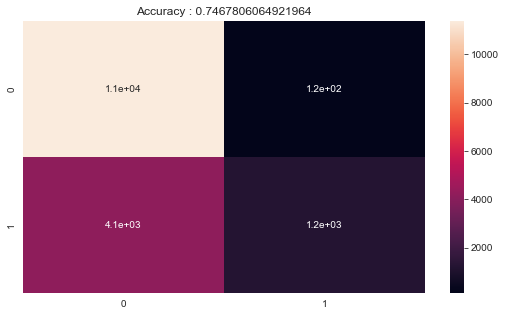

In [65]:
cv, pred = helper(train_tfidf_vec, train_label, MultinomialNB())
tfidf_acc_mnb, tfidf_cv_mnb = plotting_helper(cv, pred, train_label)

In [66]:
train_tfidf_vec_svd = svd.fit_transform(train_tfidf_vec)
# TRAIN XGB MODEL ON TEXT BASED FEATURES
cv, pred, model = lgb_xgb_helper(pd.DataFrame(train_tfidf_vec_svd), train_label, 'xgb')

[0]	train-mlogloss:0.65543	test-mlogloss:0.65549
[200]	train-mlogloss:0.26414	test-mlogloss:0.45249
[261]	train-mlogloss:0.22847	test-mlogloss:0.45632
[0]	train-mlogloss:0.65511	test-mlogloss:0.65787


D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[200]	train-mlogloss:0.26887	test-mlogloss:0.46035
[337]	train-mlogloss:0.20070	test-mlogloss:0.47151
[0]	train-mlogloss:0.65442	test-mlogloss:0.65741
[200]	train-mlogloss:0.26381	test-mlogloss:0.47301
[262]	train-mlogloss:0.22623	test-mlogloss:0.47990
[0]	train-mlogloss:0.65520	test-mlogloss:0.65780
[200]	train-mlogloss:0.28153	test-mlogloss:0.44882
[301]	train-mlogloss:0.21858	test-mlogloss:0.45674
[0]	train-mlogloss:0.65462	test-mlogloss:0.65686
[200]	train-mlogloss:0.27333	test-mlogloss:0.46072
[324]	train-mlogloss:0.20231	test-mlogloss:0.47118


CV score : 0.4563785170628619


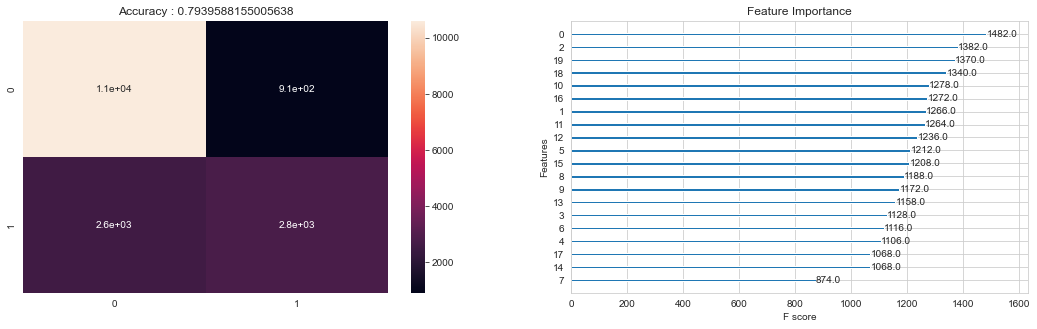

In [67]:
# PLOTTING XGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
tfidf_acc_xgb, tfidf_cv_xgb = lgb_xgb_plotting(cv, pred, train_label, model, xgb)

In [68]:
%%time
# # TRAIN LGB MODEL ON TEXT BASED FEATURES
cv, pred, model = lgb_xgb_helper(pd.DataFrame(train_tfidf_vec_svd), train_label, 'lgb')

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 13480, number of used features: 20
[LightGBM] [Info] Start training from score -0.381134
[LightGBM] [Info] Start training from score -1.149125
Training until validation scores don't improve for 200 rounds
[200]	valid_0's multi_logloss: 0.451782
Early stopping, best iteration is:
[84]	valid_0's multi_logloss: 0.440784
[LightGBM] [Warning] Unknown parameter: best_iteration
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 13481, number of used features: 20
[LightGBM] [Info] Start training from score -0.380557
[LightGBM] [Info] Start

CV score : 0.4548450574329282


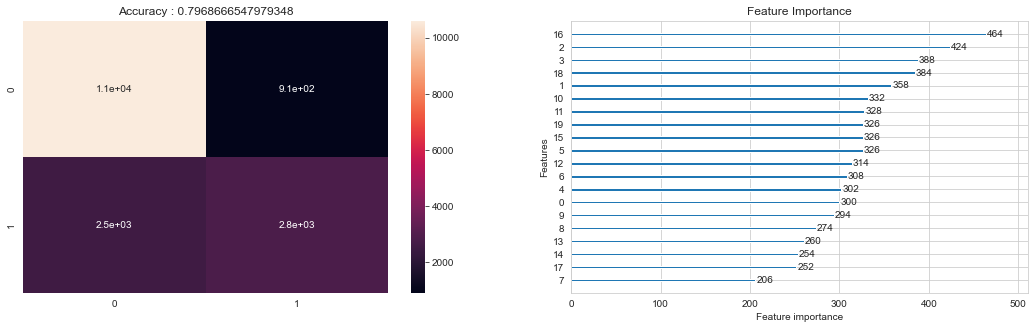

In [69]:
# PLOTTING LGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
tfidf_acc_lgb, tfidf_cv_lgb = lgb_xgb_plotting(cv, pred, train_label, model, lgb)

In [70]:
tfidf_vec_char = TfidfVectorizer(ngram_range = (1,5), stop_words= 'english', analyzer='char')
tfidf_vec_char.fit(train_backup.Text.values.tolist())
train_tfidf_vec_char = tfidf_vec_char.transform(train_backup['Text'].values.tolist())

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\sklearn\feature_extraction\text.py:538: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


CV score : 0.8853729648094578


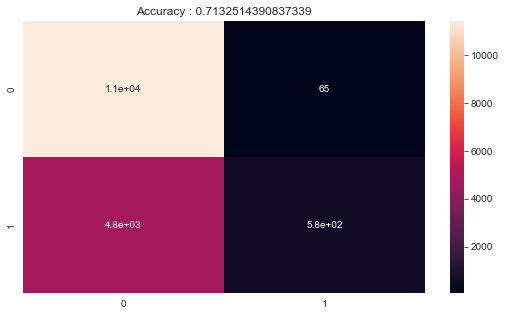

In [71]:
cv, pred = helper(train_tfidf_vec_char, train_label, MultinomialNB())
tfidf_acc_mnb_char, tfidf_cv_mnb_char = plotting_helper(cv, pred, train_label)

In [72]:
performance_accuracy = pd.concat([performance_accuracy, pd.DataFrame({'Model': ['Tfidf_MNB', 'Tfidf_XGB', 'Tfidf_LGB','Tfidf_MNB_Char'], 
                                          'Accuracy': [tfidf_acc_mnb, tfidf_acc_xgb, tfidf_acc_lgb,tfidf_acc_mnb_char]})], axis=0)

performance_logloss = pd.concat([performance_logloss, pd.DataFrame({'Model': ['Tfidf_MNB', 'Tfidf_XGB', 'Tfidf_LGB','Tfidf_MNB_Char'], 
                                          'logloss': [tfidf_cv_mnb, tfidf_cv_xgb, tfidf_cv_lgb, tfidf_acc_mnb_char]})], axis=0)

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Count_MNB_Char'),
  Text(1, 0, 'Count_MNB'),
  Text(2, 0, 'Count_XGB'),
  Text(3, 0, 'Count_LGB'),
  Text(4, 0, 'Tfidf_LGB'),
  Text(5, 0, 'Tfidf_XGB'),
  Text(6, 0, 'Tfidf_MNB'),
  Text(7, 0, 'Tfidf_MNB_Char'),
  Text(8, 0, 'Meta_LGB'),
  Text(9, 0, 'Meta_XGB')])

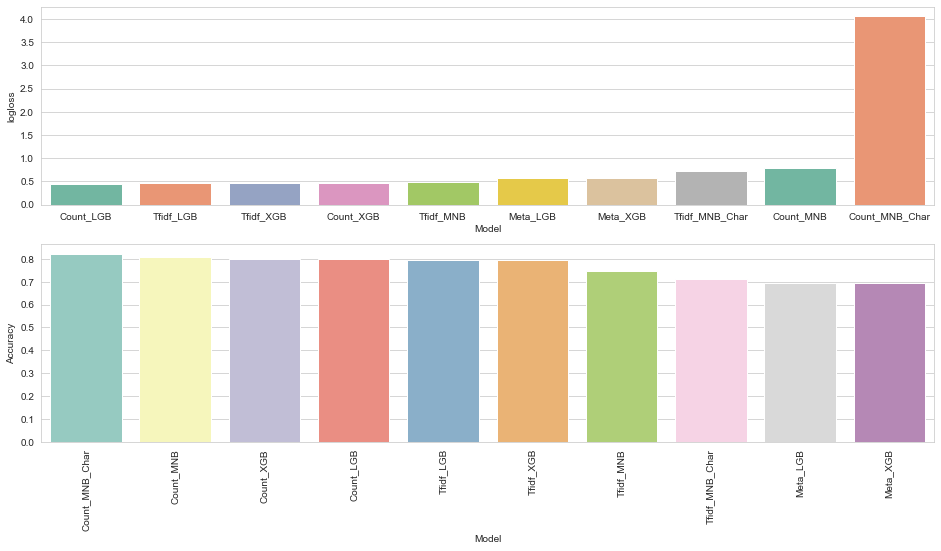

In [73]:
fig,ax= plt.subplots(2,1, figsize = (16,8))
sns.barplot('Model', 'Accuracy', data= performance_accuracy.sort_values(by = 'Accuracy', ascending=False), ax= ax[1], palette= 'Set3')
sns.barplot('Model', 'logloss', data= performance_logloss.sort_values(by = 'logloss'), ax= ax[0], palette= 'Set2')
plt.xticks(rotation= 90)